In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_generator = ImageDataGenerator(rescale=1./255,validation_split=0.1,width_shift_range=0.2,height_shift_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [ ]:
trainset='/content/drive/MyDrive/Colab Notebooks/Chi tay'

In [ ]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 15 images belonging to 5 classes.
Found 0 images belonging to 5 classes.


In [ ]:
validation_set.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(100,100,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(5,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_dataset,batch_size=128,epochs=100,verbose=1,validation_data=validation_set)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 1.9126 - accuracy: 0.1333
Epoch 2/100
1/1 [==============================] - 1s 927ms/step - loss: 6.7325 - accuracy: 0.1333
Epoch 3/100
1/1 [==============================] - 1s 952ms/step - loss: 3.9257 - accuracy: 0.1333
Epoch 4/100
1/1 [==============================] - 1s 936ms/step - loss: 1.8275 - accuracy: 0.2000
Epoch 5/100
1/1 [==============================] - 1s 937ms/step - loss: 1.7573 - accuracy: 0.2000
Epoch 6/100
1/1 [==============================] - 1s 932ms/step - loss: 1.5147 - accuracy: 0.2667
Epoch 7/100
1/1 [==============================] - 1s 929ms/step - loss: 1.6309 - accuracy: 0.2000
Epoch 8/100
1/1 [==============================] - 1s 943ms/step - loss: 1.5059 - accuracy: 0.4667
Epoch 9/100
1/1 [==============================] - 1s 930ms/step - loss: 1.3103 - accuracy: 0.6667
Epoch 10/100
1/1 [==============================] - 1s 929ms/step - loss: 1.4062 - accuracy: 0.4000
Epoch 11/100

In [ ]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 15 images belonging to 5 classes.
Found 0 images belonging to 5 classes.


In [ ]:
model.save('chitay.hs')

INFO:tensorflow:Assets written to: chitay.hs/assets


In [ ]:
model1=load_model('chitay.hs')

In [ ]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img=load_img('/content/test.jpg',target_size=(100,100))
img=img_to_array(img)
img=img.reshape(1,100,100,3)
img=img.astype('float32')
img=img/255
np.argmax(model1.predict(img),axis=-1)

array([3])

In [ ]:
label = ['a','b','c','d','e']

d


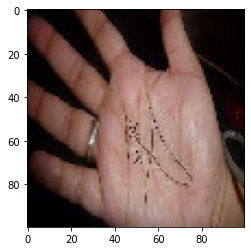

In [ ]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/test.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])